In [1]:
#install.packages("corrplot")

In [1]:
library('caret')

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
library(tidyverse)
library(corrplot)
library(Matrix)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
corrplot 0.84 loaded

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand



In [3]:
data=read.csv("train_features_denoised.csv")

In [17]:
dim(data)

[1] 4195  979

In [4]:
data[1:5,979]

[1] True True True True True
Levels: False True

In [5]:
rmcols <- rev(seq(1,ncol(data))[!as.logical(sapply(data, is.numeric))])
rmcols

[1] 979 942 804 477

In [6]:
data=subset(data, select=-c(942,979,804,477))

In [7]:
data[1:5,477]

[1] 3.9006221962 0.0011013375 3.9104893953 0.0006962814 0.0055678421

## Remove columns with zero standard deviation

In [8]:
zv <- apply(data, 2, function(x) length(unique(x)) == 1)

dfr <- data[, !zv]

n=length(colnames(dfr))

## Correlation Matrix

In [9]:
correlationMatrix <- cor(dfr[,1:n],use="complete.obs")

In [27]:
library(corrplot)


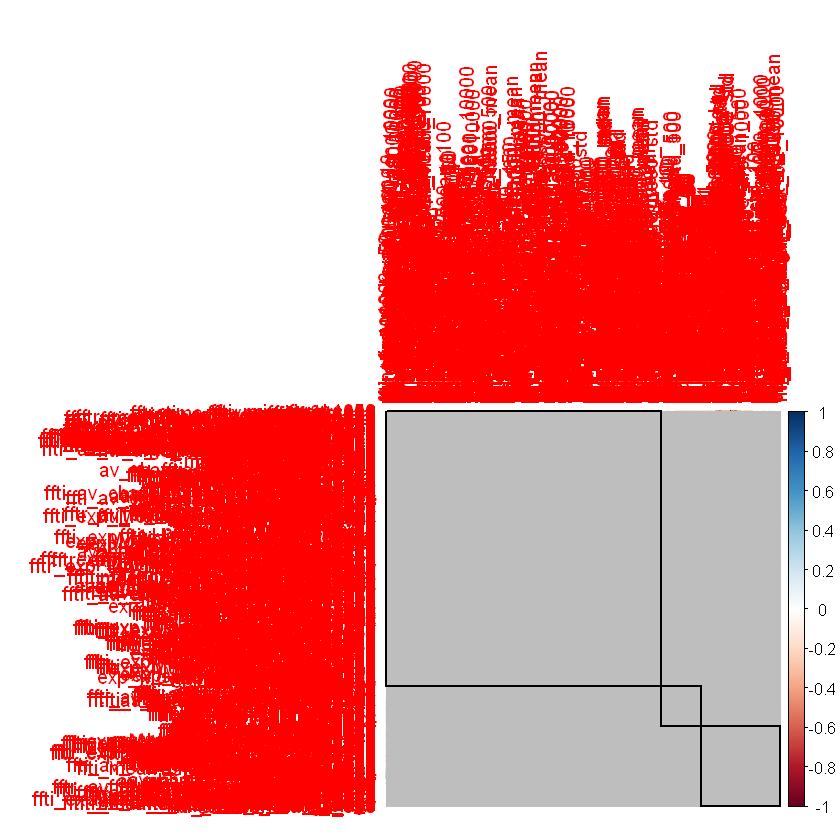

In [30]:
corrplot(correlationMatrix, order = "hclust", addrect = 3)

In [16]:
install.packages("reshape2")

library(reshape2)
library(ggplot2)

package 'reshape2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'reshape2'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Gaurav Arwade\Anaconda3\envs\r-tutorial\Lib\R\library\00LOCK\reshape2\libs\x64\reshape2.dll to C:\Users\Gaurav Arwade\Anaconda3\envs\r-tutorial\Lib\R\library\reshape2\libs\x64\reshape2.dll: Permission denied"Warning message:
"restored 'reshape2'"


The downloaded binary packages are in
	C:\Users\Gaurav Arwade\AppData\Local\Temp\Rtmp2Zk592\downloaded_packages



Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [17]:
melted_cordata <- melt(correlationMatrix)
head(melted_cordata)

Var1,Var2,value
Hann_window_mean_150,Hann_window_mean_150,1.00000000
Hann_window_mean_1500,Hann_window_mean_150,0.99967130
Hann_window_mean_15000,Hann_window_mean_150,0.99943120
Hann_window_mean_50,Hann_window_mean_150,0.99966985
Hilbert_mean,Hann_window_mean_150,-0.02727455
abs_energy,Hann_window_mean_150,-0.02605842


In [19]:
plot <- ggplot(data = melted_cordata, aes(x=Var1, y=Var2, fill=value, 
label= value))
plot_tile <- plot + geom_tile()

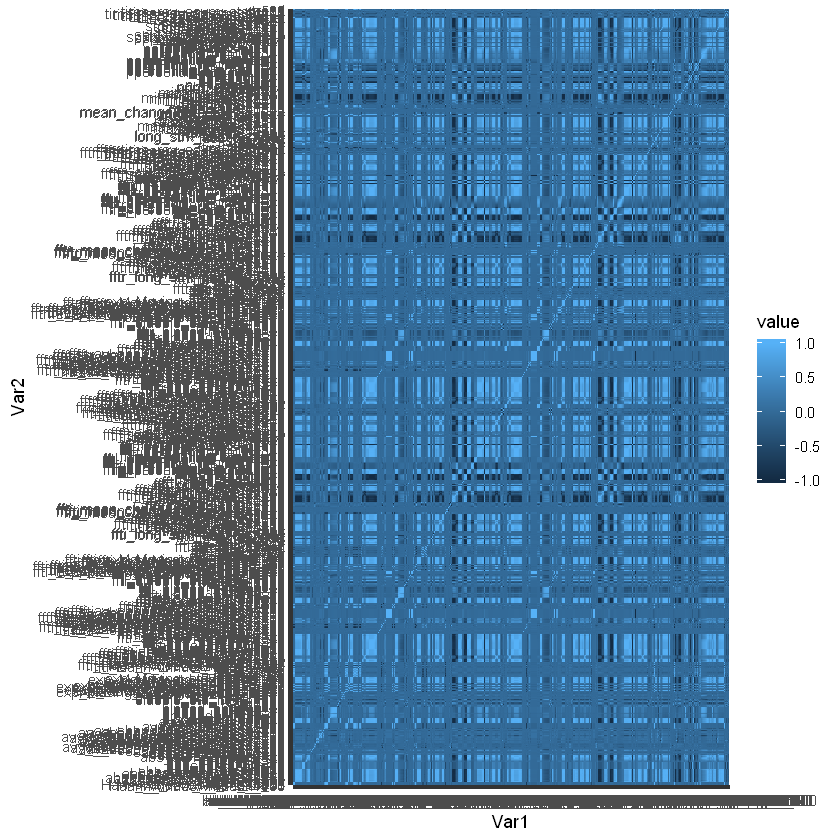

In [21]:
print(plot_tile)

In [22]:
plot_fill_color <- plot_tile + scale_fill_gradient2(low = "#132B43",high ="#56B1F7"
,mid = "white")

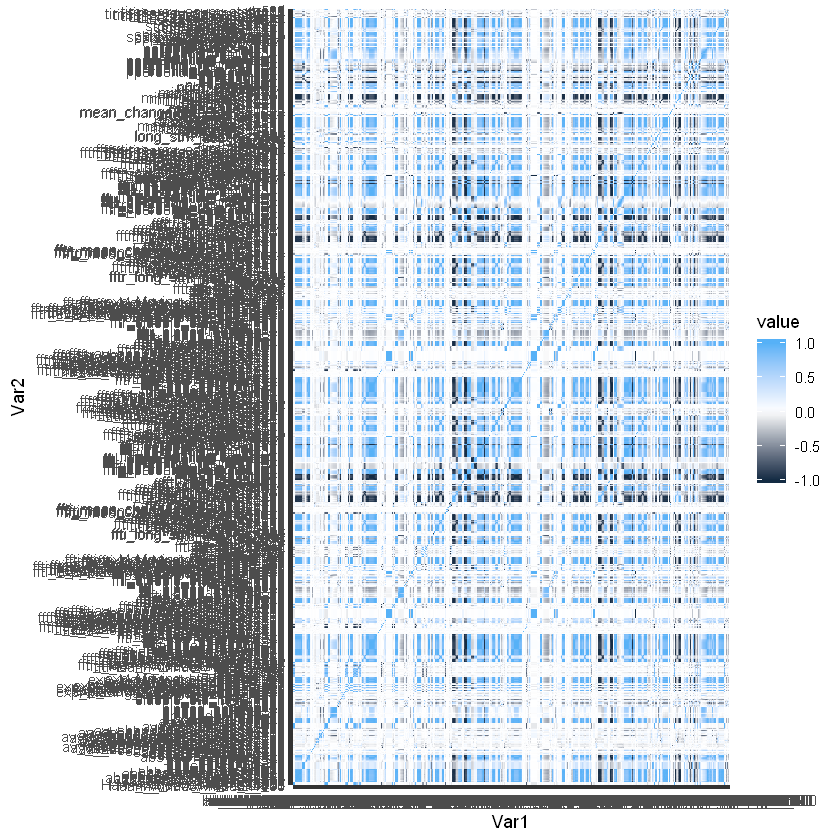

In [23]:
plot_fill_color

## Highly Correlational features remove 

In [11]:
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=(0.95),verbose = FALSE)

In [12]:
important_var=colnames(data[,-highlyCorrelated])

In [13]:
newdata = subset(data, select = c(highlyCorrelated))

In [14]:
head(newdata)

Hann_window_mean_15000,Hann_window_mean_50,abs_max_roll_mean_1000,abs_max_roll_mean_500,abs_max_roll_std_10,abs_max_roll_std_100,abs_max_roll_std_1000,abs_max_roll_std_10000,abs_max_roll_std_50,abs_max_roll_std_500,...,num_peaks_20,abs_percentile_80,percentile_roll_mean_1,percentile_roll_mean_5,first_loc_max,percentile_roll_std_40,ffti_kstat_2,fftr_classic_sta_lta3_mean,range_0_1000,percentile_40
-0.0015755255,-0.0016916405,0.5143862,1.429788,77.19083,52.39428,30.57727,10.492331,61.39826,38.17127,...,1,0.013499014,-0.014305564,-0.013499014,0.01726667,2.465721,1114031,0.9555718,122652,6.839202e-05
-0.0005067053,-0.0005379788,1.0256598,2.252655,121.95037,87.95394,38.29391,12.694477,94.07351,50.62675,...,1,0.004480948,-0.011112505,-0.004480948,0.36593333,3.238586,2389866,0.9555699,121252,3.128987e-05
0.0028781135,0.0029692535,0.6712653,1.530752,90.02805,52.96034,34.86977,13.706290,63.98284,45.08659,...,1,0.020113577,-0.010037704,-0.003077443,0.86184000,4.077025,2692227,0.9555704,136104,5.496177e-04
-0.0003524308,-0.0003818087,1.0032792,2.362434,129.66288,105.08899,52.57770,17.094134,114.25968,69.11888,...,1,0.002873622,-0.016170971,-0.004743519,0.44658667,2.580766,2686521,0.9555694,12549,-8.197059e-06
-0.0019651038,-0.0021085432,0.8483354,1.468733,98.20469,73.79307,45.19773,16.054281,83.10242,51.48768,...,2,0.017042591,-0.025710104,-0.017042591,0.53557333,2.641427,3109894,0.9555694,121561,4.756524e-05
0.0003122649,0.0003350734,0.5628706,1.380653,108.09222,65.27149,25.59098,9.151493,85.49132,34.79873,...,0,0.003513350,-0.008181189,-0.002859028,0.35218667,2.609660,1328608,0.9555722,26089,-1.221319e-04


In [15]:
write.csv(newdata, file="uncorrelated")

In [18]:
 dim(newdata)

[1] 4195  644